In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('punto_9.csv')
data2=df['user_id;timestamp;;user_id'].str.split(pat=';',expand=True)
dataTemp=data2[0]
datafinal=pd.concat([dataTemp,df['timestamp']],axis=1)

In [48]:
datafinal.columns = ['user_id', 'timestamp']

In [49]:
timesTemp = datafinal['timestamp'].apply(lambda x: datetime.strptime(x[:8], '%I %M %S').strftime('%I:%M:%S'))
times=pd.to_datetime(timesTemp, format='%I:%M:%S')

In [69]:
datafinal.groupby([times.dt.hour])['user_id'].value_counts()

timestamp  user_id
0          51         219
           136        110
           339         94
           343         93
           970         34
                     ... 
8          947          1
           948          1
           949          1
           958          1
           960          1
Name: user_id, Length: 837, dtype: int64

In [75]:
dataToPlot=datafinal.groupby([times.dt.hour])['user_id'].value_counts().max(level=0)

<AxesSubplot:xlabel='timestamp'>

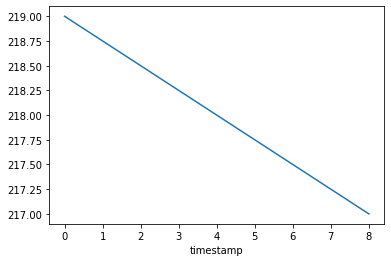

In [82]:
dataToPlot.plot()

In [38]:
datafinal.groupby([times.dt.hour])['user_id'].value_counts().unstack().fillna(0)

user_id,083,085,087,088,089,10,100,1000,1001,1003,...,981,982,984,99,990,992,993,995,997,998
timestamp,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,9.0,1.0,5.0,...,4.0,8.0,3.0,2.0,5.0,6.0,9.0,4.0,7.0,16.0
8,2.0,2.0,3.0,4.0,6.0,4.0,4.0,9.0,1.0,5.0,...,4.0,8.0,3.0,2.0,5.0,6.0,9.0,4.0,7.0,16.0
